In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis


In [5]:
customer_data = pd.read_csv('Customers_Data.csv')

In [6]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,25,15,45
1,2,Male,26,15,54
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# finding the no. of rows and columns
customer_data.shape

(210, 5)

In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              210 non-null    int64 
 1   Gender                  210 non-null    object
 2   Age                     210 non-null    int64 
 3   Annual Income (k$)      210 non-null    int64 
 4   Spending Score (1-100)  210 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.3+ KB


In [9]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual income column & spending score column


In [13]:
X = customer_data.iloc[:,[3,4]].values

In [14]:
print(X)

[[ 15  45]
 [ 15  54]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the no. of clusters

WCSS : Within clusters sum of squares

In [17]:
wcss = []
for i in range (1,11) :
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 45)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    

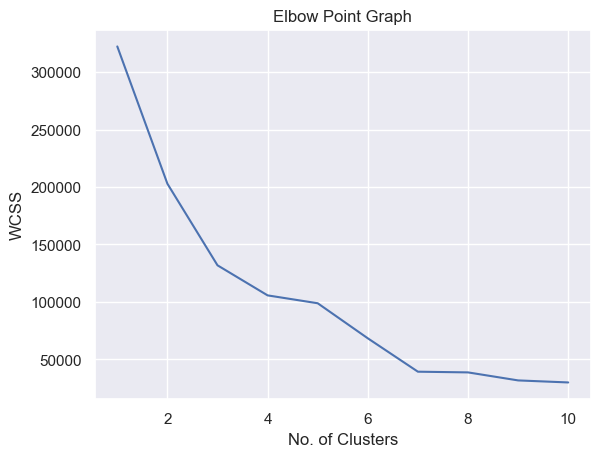

In [18]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no. of clusters = 7


In [19]:
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=0)

#return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)
print(Y)

[2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 5 2 5 2 5 2 0 2 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 6 3 6 3 6 3 1 3 6 6 6 6 6 6 6]


Visualizing all the Clusters

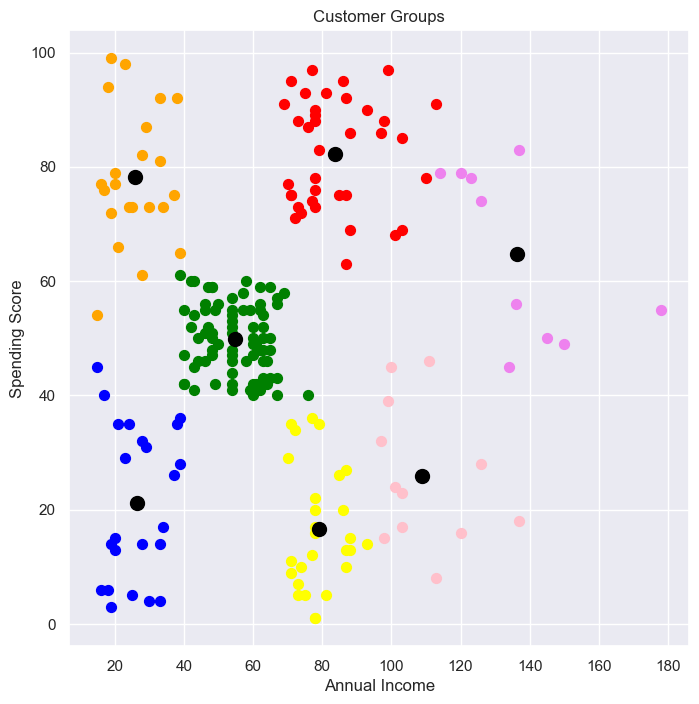

In [23]:
# plotting all the clusters and their centroids 

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1],s = 50 ,c = 'green',label = 'cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1],s = 50 ,c = 'red',label = 'cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1],s = 50 ,c = 'blue',label = 'cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1],s = 50 ,c = 'pink',label = 'cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1],s = 50 ,c = 'yellow',label = 'cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1],s = 50 ,c = 'orange',label = 'cluster 6')
plt.scatter(X[Y==6,0], X[Y==6,1],s = 50 ,c = 'violet',label = 'cluster 7')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100 , c = 'black', label='centeroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()